In [1]:
# Import required modules
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import re
import pprint
import glob
import pickle
import traceback
import logging
import os.path, time
from datetime import datetime, timedelta

# CSV files we have got so far

In [2]:
import os
for index,i in enumerate(sorted(os.listdir("csv/"))):
    print(index,i)

0 Business & entrepreneur.csv
1 Business & entrepreneurAuthors.csv
2 Commercial events.csv
3 Commercial eventsAuthors.csv
4 Complaints corner.csv
5 Complaints cornerAuthors.csv
6 Concerts.csv
7 ConcertsAuthors.csv
8 Daily life.csv
9 Daily lifeAuthors.csv
10 Education.csv
11 EducationAuthors.csv
12 Employment.csv
13 EmploymentAuthors.csv
14 Entertainment & dining.csv
15 Entertainment & diningAuthors.csv
16 Family mattershealth.csv
17 Family mattershealthAuthors.csv
18 Financebankingtaxation.csv
19 FinancebankingtaxationAuthors.csv
20 Food and drink.csv
21 Food and drinkAuthors.csv
22 Insurance.csv
23 InsuranceAuthors.csv
24 Introductions.csv
25 IntroductionsAuthors.csv
26 Language corner.csv
27 Language cornerAuthors.csv
28 Leaving Switzerland.csv
29 Leaving SwitzerlandAuthors.csv
30 Othergeneral.csv
31 OthergeneralAuthors.csv
32 Permitsvisasgovernment.csv
33 PermitsvisasgovernmentAuthors.csv
34 Pet corner.csv
35 Pet cornerAuthors.csv
36 Social events.csv
37 Social eventsAuthors.csv
38 

# Load all data at once

In [3]:
dfAuthors={}
filenames = [fn for fn in glob.glob("csv/*.csv") 
         if os.path.basename(fn).endswith('Authors.csv')]
for index,filename in enumerate(filenames):

    df = pd.read_csv(filename, header=0,sep='\t',index_col=0)
    df = df[['topic','thread','user','views','replies','location','date','post','user_posts','since','exp','thanked','groaned','reputation']]
    dfAuthors[re.sub(r'.csv','',os.path.basename(filename))]=df
print(filenames,dfAuthors.keys())

dfAuthors['ConcertsAuthors'].head(3)
# dfAuthors['Business & entrepreneurAuthors'][['thread','user','date','post','user_posts','since','exp','thanked','groaned','reputation']]

['csv/Business & entrepreneurAuthors.csv', 'csv/ConcertsAuthors.csv', 'csv/EducationAuthors.csv', 'csv/PermitsvisasgovernmentAuthors.csv', 'csv/Commercial eventsAuthors.csv', 'csv/Travelday tripsfree timeAuthors.csv', 'csv/Daily lifeAuthors.csv', 'csv/EmploymentAuthors.csv', 'csv/TransportationdrivingAuthors.csv', 'csv/Language cornerAuthors.csv', 'csv/Swiss news via The LocalAuthors.csv', 'csv/TVinternettelephoneAuthors.csv', 'csv/OthergeneralAuthors.csv', 'csv/Swiss politicsnewsAuthors.csv', 'csv/IntroductionsAuthors.csv', 'csv/Social eventsAuthors.csv', 'csv/Food and drinkAuthors.csv', 'csv/Leaving SwitzerlandAuthors.csv', 'csv/FinancebankingtaxationAuthors.csv', 'csv/Family mattershealthAuthors.csv', 'csv/InsuranceAuthors.csv', 'csv/Entertainment & diningAuthors.csv', 'csv/Complaints cornerAuthors.csv', 'csv/Pet cornerAuthors.csv', 'csv/Sports  Fitness  Beauty  WellnessAuthors.csv'] dict_keys(['Food and drinkAuthors', 'EmploymentAuthors', 'Business & entrepreneurAuthors', 'Entertai

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Concerts,"Switzerland Gigs ""Heads Up""",Yokine,152605,1100,Perthia,"06.05.2009, 16:20",Mod Insert: Please . Can't be bothered si...,1233.0,Mar 2006,5.0,"['901', '444']","['1', '1']",6
1,Concerts,Small bars/places with acoustic livemusic?,JHC,978,5,"Lenzburg, Aargau","19.11.2016, 19:45",\r\n\t\t\t\r\n\t\t\tI am living in Kanton Aar...,3.0,Nov 2016,0.0,"['0', '0']","['0', '0']",0
2,Concerts,Jazz clubs Zurich?,aromeroa,3869,16,Spain,"28.11.2015, 22:48",\r\n\t\t\t\r\n\t\t\tHello there! \r\nI am a...,6.0,Jul 2015,0.0,"['0', '0']","['0', '0']",0


# Plotting
We are goin to plot several statistics: The most viewed thread per topic, most replied and viewd threads...

We will first transform our string data to integers, so we can plot it. Then we will join al interesting data in a df and obtain general statistical information.

In [4]:
for key in dfAuthors:
    dfAuthors[key]['views']=dfAuthors[key]['views'].apply(lambda x: int(x.replace(',','').replace('-','0')) if type(x)== str else x)
    dfAuthors[key]['replies']=dfAuthors[key]['replies'].apply(lambda x: int(str(x).replace(',','').replace('-','0'))if type(x)== str else x)
dfAuthors['ConcertsAuthors'].head(3)

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Concerts,"Switzerland Gigs ""Heads Up""",Yokine,152605,1100,Perthia,"06.05.2009, 16:20",Mod Insert: Please . Can't be bothered si...,1233.0,Mar 2006,5.0,"['901', '444']","['1', '1']",6
1,Concerts,Small bars/places with acoustic livemusic?,JHC,978,5,"Lenzburg, Aargau","19.11.2016, 19:45",\r\n\t\t\t\r\n\t\t\tI am living in Kanton Aar...,3.0,Nov 2016,0.0,"['0', '0']","['0', '0']",0
2,Concerts,Jazz clubs Zurich?,aromeroa,3869,16,Spain,"28.11.2015, 22:48",\r\n\t\t\t\r\n\t\t\tHello there! \r\nI am a...,6.0,Jul 2015,0.0,"['0', '0']","['0', '0']",0


In [5]:
dfContainer={}
filenames = [fn for fn in glob.glob("old_csv/*.csv") 
         if not os.path.basename(fn).endswith('Authors.csv')]
for index,filename in enumerate(filenames):
    df = pd.read_csv(filename, header=0,sep='\t',index_col=0)
    dfContainer[re.sub(r'.csv','',os.path.basename(filename))]=df

# sorted(dataframes)
# dataFrames = pd.Series(dataFrames)
# df=pd.read_csv('Concerts',sep='\t',index_col=0)
# df

dfContainer['Transportationdriving'].head(2)

,hrefs,posts,replies,threads,views
0,http://www.englishforum.ch/transportation-driv...,"\r\n\t\t\t\r\n\t\t\tSince January 1 2013, the...",575,"Serious Speeding - the law, the fines.","134,880"
1,http://www.englishforum.ch/transportation-driv...,"\r\n\t\t\t\r\n\t\t\tHello, \nI bought a ca...",91,Car and engine cleaning pre mfk test,"37,509"


## Join DF to save

It will be usefull to concat all the df, so we can easily find the most viewed and replied threads. It will also facilitate the work for the ML

In [6]:
dfJoin=pd.DataFrame()
for index,df in enumerate(dfAuthors):
    dfJoin=dfJoin.append(dfAuthors[df],ignore_index=True)
dfJoin['views']=dfJoin['views'].apply(lambda x: int(x.replace(',','').replace('-','0')) if type(x)== str else x)
dfJoin['replies']=dfJoin['replies'].apply(lambda x: int(str(x).replace(',','').replace('-','0'))if type(x)== str else x)
# dfJoin['topic']=''
suma=0
for key in dfContainer:
    suma+=len(dfContainer[key])
print('dfJoin vs dfContainer\nlen dataframes',suma,len(dfJoin))
print('3 removed from Lugano')
print('len topics',len(dfJoin['topic'].unique()),len(dfContainer))

dfJoin vs dfContainer
len dataframes 107499 107494
3 removed from Lugano
len topics 25 25


In [7]:
print(len(dfJoin),len(dfJoin.values))
# dfJoin
dfJoin.head(2)

107494 107494


,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Food and drink,Posting guideline for Food & Drink,Nathu,17566,0,Zürich,"18.11.2008, 11:36",\r\n\t\t\t\r\n\t\t\tAs it will take some time...,4674.0,Apr 2007,6,"['18', '16']","['2', '208', '1', '248']",6
1,Food and drink,Good Asian restaurants in Zurich city?,rob1,6173,65,north,"14.06.2016, 14:06",\r\n\t\t\t\r\n\t\t\tI also endorse these opti...,6138.0,May 2010,6,"['226', '146']","['5', '095', '2', '633']",6


### The 2 most viewed threads per topic

We will like to give a fast look to all the topics and see which are the thread more relevants (per this ones). This is the reason for the next plot. 

In [8]:
moreViews=pd.DataFrame()
Views=pd.DataFrame()
viewsStats=pd.DataFrame()
repliesStats=pd.DataFrame()
for index,key in enumerate(dfAuthors):
#     dfContainer[key].views=dfContainer[key].apply(lambda x: int(x[4].replace(',','').replace('-','0')),axis=1)
    viewsStats[key]=dfAuthors[key].describe()['views']
    repliesStats[key]=dfAuthors[key].describe()['replies']
    temp=dfAuthors[key][['thread','views']]
    temp2=temp.sort_values('views',ascending=0)[:2]['views']
    temp2.index=[np.arange(2)]
    Views[key]=temp2
    temp=temp.sort_values('views',ascending=0)[:2]
    temp['index2']=key
    temp.index=[temp.index2,temp.thread]
    temp=temp.drop(['index2','thread'],1)
    moreViews=moreViews.append(temp)




/home/josele/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


The next figure shows us the the most 2 viewed thread per topic


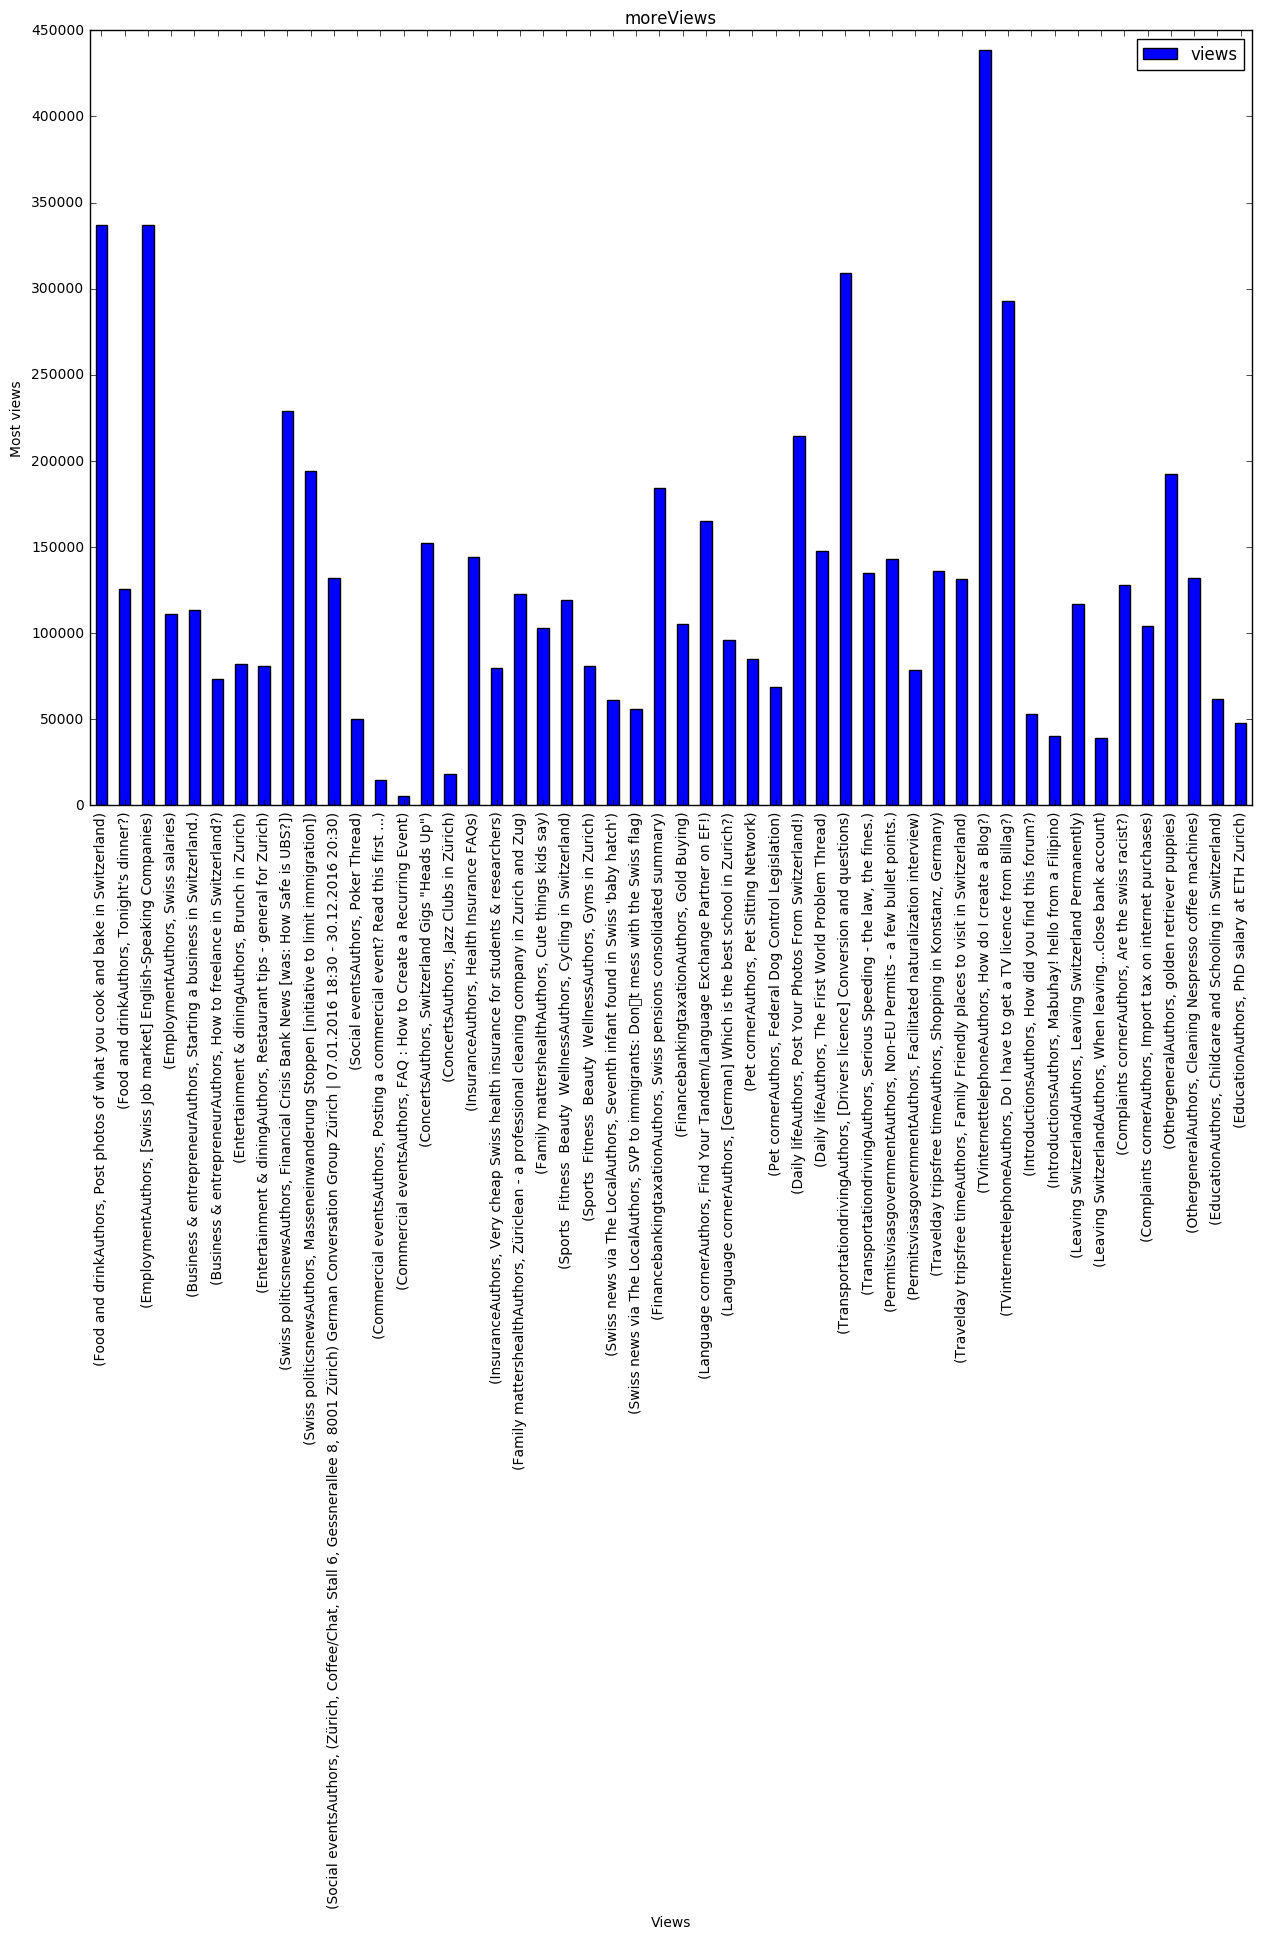

views
index2                         thread                                                    
Food and drinkAuthors          Post photos of what you cook and bake in Switze...  336871
                               Tonight's dinner?                                   125659
EmploymentAuthors              [Swiss Job market] English-Speaking Companies       337121
                               Swiss salaries                                      111274
Business & entrepreneurAuthors Starting a business in Switzerland.                 113495
                               How to freelance in Switzerland?                     73205
Entertainment & diningAuthors  Brunch in Zurich                                     82366
                               Restaurant tips - general for Zurich                 81158
Swiss politicsnewsAuthors      Financial Crisis Bank News [was: How Safe is UBS?]  228928
                               Masseneinwanderung Stoppen [initiative to limit...  194052

In [9]:
print("The next figure shows us the the most 2 viewed thread per topic")
moreViews.plot.bar(figsize=(15,10))
plt.title('moreViews')
plt.xlabel('Threads')
plt.ylabel('Views')
# Views.plot(kind='bar',figsize=(15,10))
plt.title('moreViews')
plt.xlabel('Views')
plt.ylabel('Most views')
plt.show()
moreViews.head(10)

In [10]:
viewsStats

,Food and drinkAuthors,EmploymentAuthors,Business & entrepreneurAuthors,Entertainment & diningAuthors,Swiss politicsnewsAuthors,Social eventsAuthors,Commercial eventsAuthors,ConcertsAuthors,InsuranceAuthors,Family mattershealthAuthors,...,Daily lifeAuthors,TransportationdrivingAuthors,PermitsvisasgovernmentAuthors,Travelday tripsfree timeAuthors,TVinternettelephoneAuthors,IntroductionsAuthors,Leaving SwitzerlandAuthors,Complaints cornerAuthors,OthergeneralAuthors,EducationAuthors
count,4247.000000,6206.000000,2117.000000,1729.000000,1790.000000,17.000000,48.000000,848.000000,1959.000000,7284.000000,...,11390.000000,7881.000000,7365.000000,3844.000000,5556.000000,13379.000000,1011.000000,3054.000000,8187.000000,1337.000000
mean,3312.573581,2881.488237,2282.867737,3313.116252,4728.116760,14733.235294,839.416667,1622.370283,2416.063298,2713.388797,...,3148.928183,2537.295140,1911.913781,2437.736993,2934.446364,954.654982,2575.684471,4427.314997,2730.984488,1864.363500
std,6931.852145,6447.636503,3858.961418,5277.330614,10655.982719,32585.474601,2152.131628,5346.421560,4407.505635,4086.472894,...,5914.934703,5405.366332,3338.595089,4509.482958,8780.454169,1060.230704,4708.098245,6728.563269,4930.084400,2991.731303
min,0.000000,0.000000,0.000000,0.000000,0.000000,166.000000,170.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1174.000000,1048.000000,1045.000000,1145.000000,1313.000000,593.000000,288.500000,925.500000,1122.500000,987.000000,...,947.000000,907.000000,820.000000,941.000000,984.750000,569.000000,1088.000000,1510.500000,940.000000,845.000000
50%,2026.000000,1619.500000,1489.000000,1801.000000,2215.500000,2514.000000,408.000000,1160.000000,1629.000000,1652.000000,...,1648.500000,1457.000000,1220.000000,1460.000000,1536.500000,725.000000,1620.000000,2676.000000,1514.000000,1228.000000
75%,3715.500000,2885.750000,2424.000000,3395.000000,4578.250000,10392.000000,537.000000,1523.750000,2572.500000,2999.000000,...,3307.000000,2655.000000,2017.000000,2486.000000,2762.250000,998.000000,2614.000000,5083.250000,2777.000000,1881.000000
max,336871.000000,337121.000000,113495.000000,82366.000000,228928.000000,132178.000000,14473.000000,152605.000000,144466.000000,122699.000000,...,214706.000000,309410.000000,142892.000000,136077.000000,438685.000000,52843.000000,117144.000000,127714.000000,192340.000000,61863.000000


In [11]:
repliesStats

,Food and drinkAuthors,EmploymentAuthors,Business & entrepreneurAuthors,Entertainment & diningAuthors,Swiss politicsnewsAuthors,Social eventsAuthors,Commercial eventsAuthors,ConcertsAuthors,InsuranceAuthors,Family mattershealthAuthors,...,Daily lifeAuthors,TransportationdrivingAuthors,PermitsvisasgovernmentAuthors,Travelday tripsfree timeAuthors,TVinternettelephoneAuthors,IntroductionsAuthors,Leaving SwitzerlandAuthors,Complaints cornerAuthors,OthergeneralAuthors,EducationAuthors
count,4247.000000,6206.000000,2117.000000,1729.000000,1790.000000,17.000000,48.000000,848.000000,1959.000000,7284.000000,...,11390.000000,7881.000000,7365.000000,3844.000000,5556.000000,13379.000000,1011.000000,3054.000000,8187.000000,1337.000000
mean,19.335060,11.862391,9.912612,10.812608,48.135196,51.941176,2.104167,5.176887,10.202654,14.832098,...,23.040825,13.090725,8.928038,8.053070,13.285277,6.495926,11.321464,48.750491,10.842311,9.133134
std,58.180227,19.089089,24.554912,21.565003,155.207446,113.832921,4.501723,38.642085,17.112297,31.402315,...,58.916850,26.993443,16.542621,12.083769,41.117808,10.292168,21.088839,88.779603,21.558548,15.914637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,11.000000,2.000000,2.000000
50%,9.000000,6.000000,5.000000,4.000000,15.000000,3.000000,0.000000,1.000000,6.000000,6.000000,...,9.000000,6.000000,5.000000,4.000000,6.000000,4.000000,5.000000,26.000000,5.000000,4.000000
75%,22.000000,14.000000,11.000000,11.000000,41.750000,42.000000,2.000000,4.000000,12.000000,15.000000,...,24.000000,15.000000,11.000000,10.000000,13.000000,8.000000,12.000000,57.000000,12.000000,10.000000
max,2766.000000,453.000000,770.000000,320.000000,3586.000000,445.000000,22.000000,1100.000000,403.000000,1016.000000,...,2607.000000,1378.000000,644.000000,212.000000,1543.000000,462.000000,249.000000,2000.000000,632.000000,280.000000


Now we will plot the most viewed and replied threads. We maintain the topic name which they belong to and add  the values of value of the opposite plot (per thread) for be able to compare them.


In [16]:
mostviews=dfJoin[['thread','views','replies']].sort_values('views',ascending=0)[:15]
mostviews['index2']=dfJoin['topic']
mostviews.index=[mostviews.index2,mostviews.thread]
top15views=mostviews.drop(['index2','thread'],1)
mostreplies=dfJoin[['thread','replies','views']].sort_values('replies',ascending=0)[:15]
mostreplies['index2']=dfJoin['topic']
mostreplies.index=[mostreplies.index2,mostreplies.thread]
top15replies=mostreplies.drop(['index2','thread'],1)

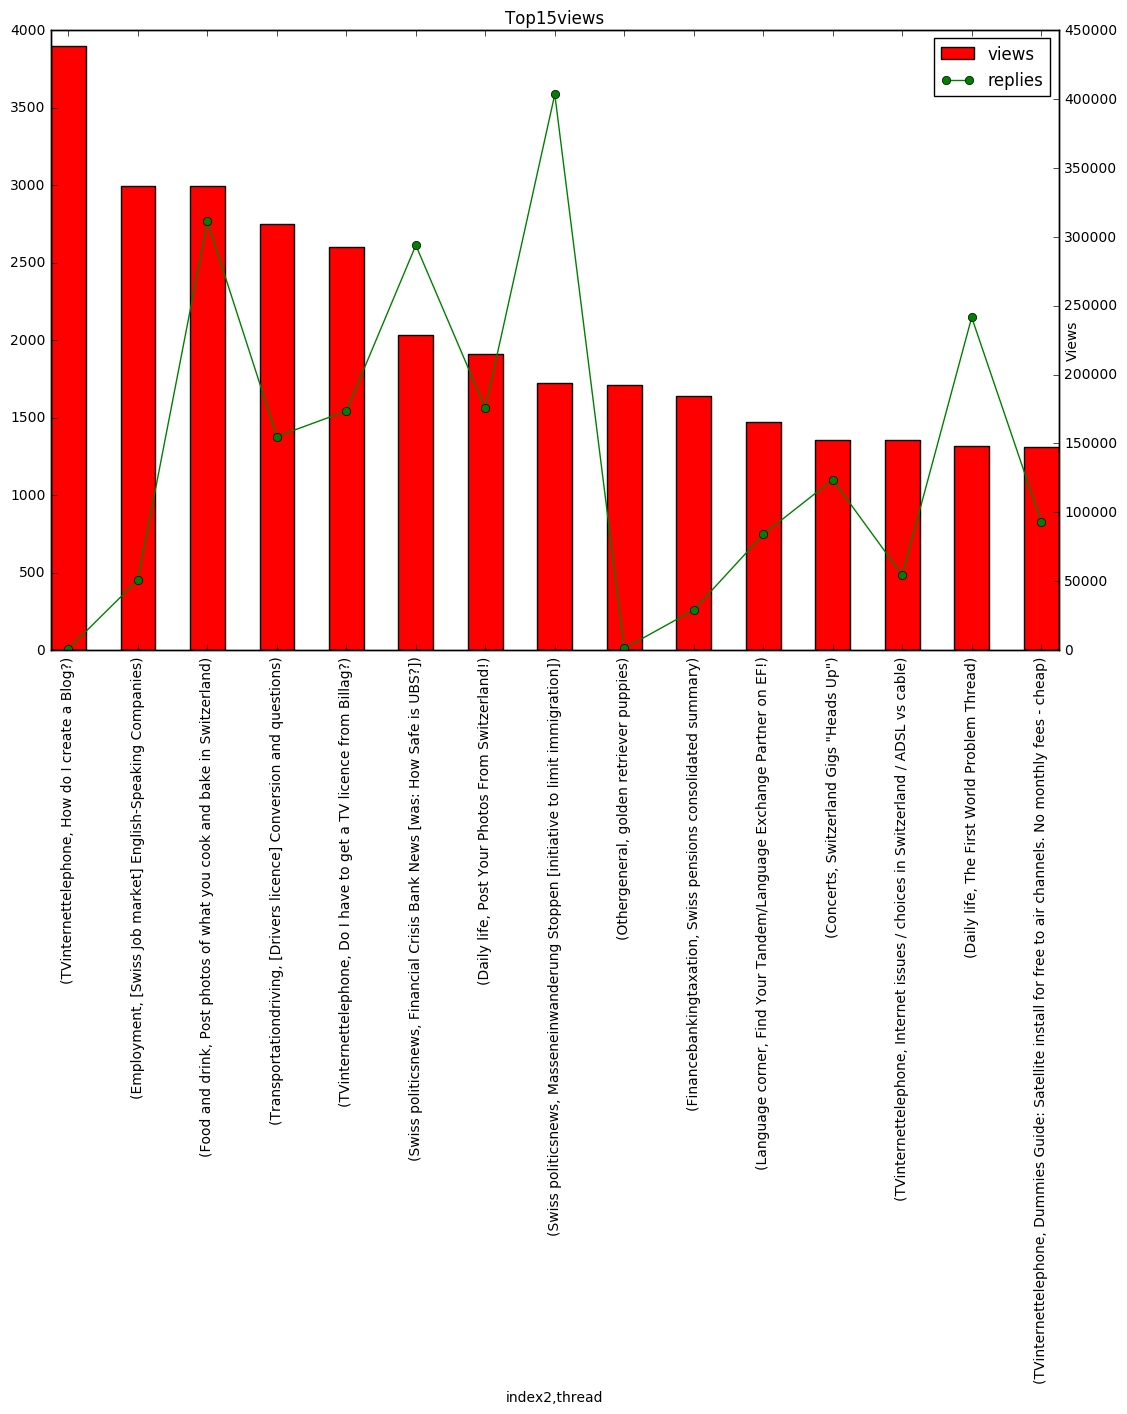

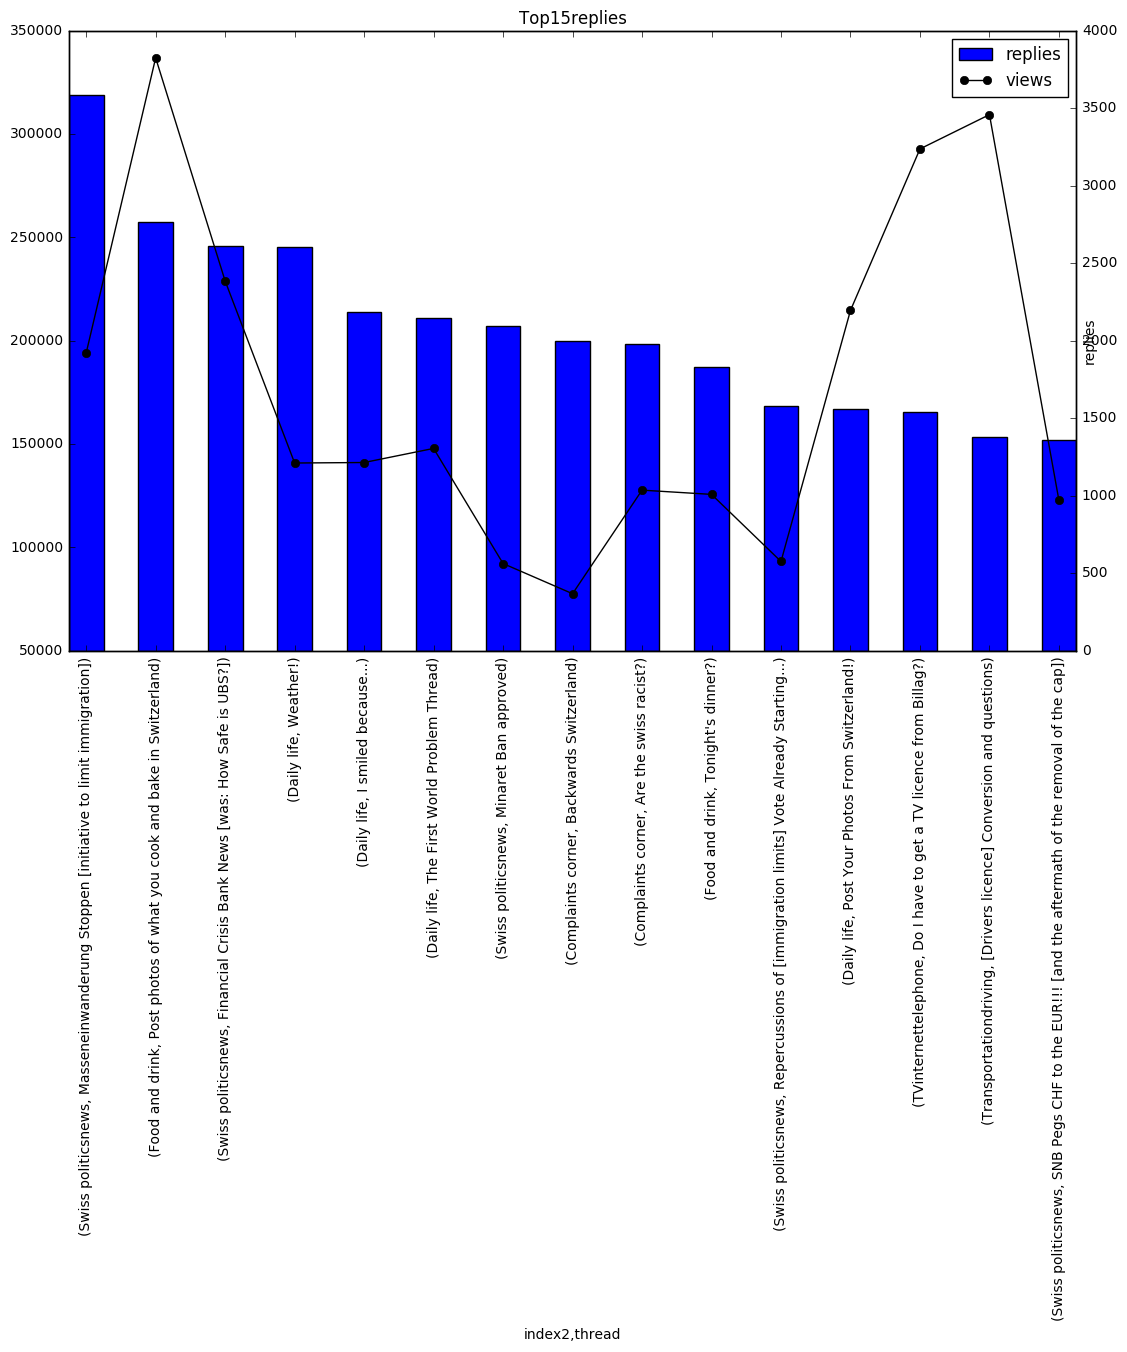

In [25]:
ax=top15views.drop(['replies'],1).plot.bar(figsize=(13,8),color='r')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),top15views.drop(['views'],1),marker='o', color='g', linewidth=1.0, label='replies')
plt.title('Top15views')
plt.xlabel('Threads')
plt.ylabel('Views')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax.yaxis.set_ticks_position("right")
ax2.yaxis.set_ticks_position("left")
plt.show()
ax3=top15replies.drop(['views'],1).plot.bar(figsize=(13,8))
ax4 = ax3.twinx()
ax4.plot(ax3.get_xticks(),top15replies.drop(['replies'],1),marker='o', color='k', linewidth=1.0, label='views')
plt.title('Top15replies')
plt.xlabel('Threads')
plt.ylabel('replies')
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax3.legend(lines3 + lines4, labels3 + labels4, loc='best')
ax3.yaxis.set_ticks_position("right")
ax4.yaxis.set_ticks_position("left")
plt.show()


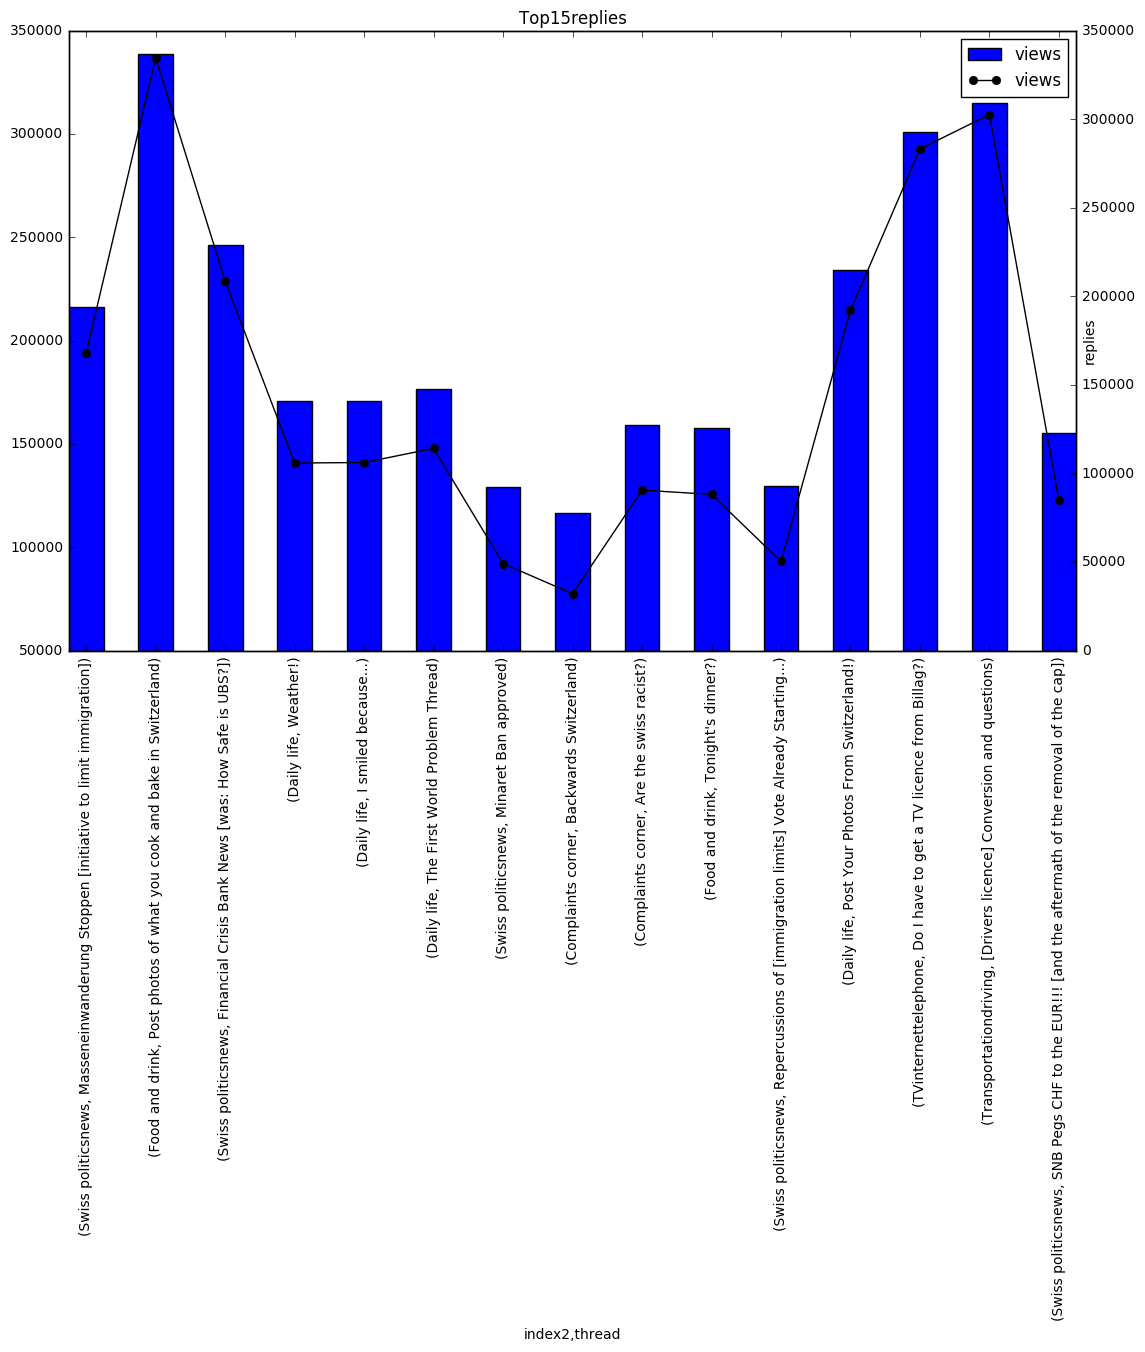

# Obj Saver
This will be excluded from GitHub beacuse of the objs sizes.

In [14]:
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

## WordCloud

For the Taming Text we will start generating some WordCloud for each topic, giving us an idea of which words are the ones that have more presence and remove useless words that could scape from our initial stopword. 
Instead of showing them all one the notebook, we will save them in localstorage.

In [15]:
from wordcloud import WordCloud, STOPWORDS
import nltk as nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop = set(stopwords.words('english'))
stop.update([".",",","?",")","(",":","/","!","%","-",""])
stop.update(STOPWORDS)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
wnl = WordNetLemmatizer()
forumTextContainer={}
i=0
for key in dfAuthors:
    temp=dfAuthors[key][['thread','post']]
    lista=[]
    print(i)
    print("There are %s null values" %temp.isnull().values.sum())
    temp=temp.dropna()
    for index,thread in temp.iterrows():
        allwords=[]
        text_tk = nltk.word_tokenize(thread['post']) 
        word_tag_fd = nltk.pos_tag(text_tk,tagset='universal') # for simplifying the task, we will une the universal tagset
        for wt in word_tag_fd:
            if  (wt[0] not in stop) and (wt[1] == 'NOUN' or wt[1] == 'ADJ'):
                allwords.append(wnl.lemmatize(wt[0]))
            elif (wt[0] not in stop) and (wt[1] == 'VERB'):
                allwords.append(wnl.lemmatize(wt[0],'v'))
                        
        if(len(allwords)>3): # We remove irrelevant posts
            lista.append((thread['thread'],allwords))
           
    forumTextContainer[key]=(lista)
    i+=1

save_obj(forumTextContainer, 'forumTextContainer') 



0
There are 0 null values
1
There are 0 null values
2
There are 0 null values
3
There are 0 null values
4
There are 0 null values
5
There are 0 null values
6
There are 0 null values
7
There are 0 null values
8
There are 0 null values
9
There are 0 null values
10
There are 0 null values
11
There are 0 null values
12
There are 0 null values
13
There are 0 null values
14
There are 0 null values
15
There are 0 null values
16
There are 0 null values
17
There are 0 null values
18
There are 0 null values
19
There are 0 null values
20
There are 0 null values
21
There are 0 null values
22
There are 61 null values
23
There are 0 null values
24
There are 0 null values


## Loading TK

In [18]:
# Loading threads tk. Only run it if you have the obj file (Running the previous cell)
forumTextContainer=load_obj('forumTextContainer')

/home/josele/anaconda3/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


dict_keys(['FinancebankingtaxationAuthors', 'EducationAuthors', 'TransportationdrivingAuthors', 'Travelday tripsfree timeAuthors', 'Social eventsAuthors', 'Family mattershealthAuthors', 'EmploymentAuthors', 'OthergeneralAuthors', 'Entertainment & diningAuthors', 'Daily lifeAuthors', 'Leaving SwitzerlandAuthors', 'Swiss politicsnewsAuthors', 'Commercial eventsAuthors', 'Swiss news via The LocalAuthors', 'Sports  Fitness  Beauty  WellnessAuthors', 'TVinternettelephoneAuthors', 'PermitsvisasgovernmentAuthors', 'IntroductionsAuthors', 'Language cornerAuthors', 'InsuranceAuthors', 'Pet cornerAuthors', 'Business & entrepreneurAuthors', 'ConcertsAuthors', 'Complaints cornerAuthors', 'Food and drinkAuthors'])


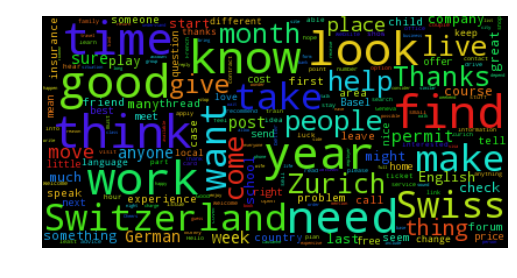

'Food and drinkAuthors'

In [19]:
# forumTextContainer['Education'][0]
from collections import defaultdict
from nltk.probability import ConditionalFreqDist
from gensim import corpora, models, similarities
from gensim.models import  ldamodel
frequency = defaultdict(int)
# Counting the freq of the words in a topic. (stopwords already done)
print(forumTextContainer.keys())
for key in forumTextContainer:
    for thread in forumTextContainer[key]:
        for token in thread[1]:
            if len(token)>3:
                frequency[token] += 1
    # [(k, frequency[k]) for k in sorted(frequency, key=frequency.get, reverse=True)]
    words=[(k, frequency[k]) for k in sorted(frequency, key=frequency.get, reverse=True)]
    word_c=WordCloud()
    wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate_from_frequencies(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig(('wordcloud/'+key+'.png'))
plt.show()
key

## Topic modeling for threads

For the topic modeling we will be using the tf–idf Vector Space Model algorithm (from gensim library).One reason for this selection is that 83% of text-based recommender systems in the domain of digital libraries. However, we will mix it with the lsimodel.
<a href="http://people.mpi-inf.mpg.de/~bast/ir-seminar-ws04/project-summaries/pleng_chirawatkul.pdf">LS
I
M
ode
l
wit
h
TF-
IDF
Term 
W
e
ight
i
n
g<a>

In [20]:
pp=pprint.PrettyPrinter(compact=1)
frequency = defaultdict(int)
# Here, we will count the frequency of the words in all the topic
for thread in forumTextContainer['EducationAuthors']:
    for token in thread[1]:
        if len(token)>3:
            frequency[token] += 1
# Now, we will remove words that have a small value of freq compared with the length of the thread.
# We also organize our tokens in a list per thread
texts = [[token for token in threads[1] if frequency[token]> math.ceil(len(threads[1])/15)] # The really huge topics are reduced
         for threads in forumTextContainer['EducationAuthors']]

dictionary = corpora.Dictionary(texts)
print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus, normalize=True)
corpus_tfidf = tfidf[corpus]
print("Number of threads: %d"%len(corpus))

Dictionary(1698 unique tokens: ['Well', 'year', 'Happy', 'affect', 'rough']...)
Number of threads: 1239


In [21]:
lsi = models.LsiModel(corpus_tfidf,id2word=dictionary, num_topics=10)

topics=[" ".join(re.findall("\"[a-z]+\"",topic[1])) for topic in lsi.print_topics(10,20)]
[(print("topic %d: %s \n" %(i,topic)) ) for (i,topic) in enumerate(topics)]

topic 0: "school" "child" "year" "know" "language" "local" "class" "need" "work" "look" "good" "teacher" "find" "think" "experience" "start" 

topic 1: "school" "child" "study" "course" "program" "anyone" "class" "local" "find" "look" "year" "know" "university" "information" "teacher" "apply" "degree" 

topic 2: "school" "language" "anyone" "course" "teach" "experience" "speak" "know" "share" "information" "learn" "child" "move" 

topic 3: "anyone" "speak" "university" "work" "student" "look" "language" "study" "thanks" "daughter" "need" "system" "program" 

topic 4: "school" "anyone" "daughter" "offer" "study" "thanks" "find" "course" "time" "post" "help" "public" "experience" "thing" "teacher" 

topic 5: "anyone" "information" "year" "school" "luck" "work" "good" "daughter" "post" "study" "start" "link" "thank" "class" 

topic 6: "look" "class" "teacher" "move" "year" "area" "place" "know" "start" "think" "anyone" "daughter" "live" "good" "month" "answer" 

topic 7: "good" "offer" "y

[None, None, None, None, None, None, None, None, None, None]

## Searching Queries
Performance is increased by

In [22]:
new_doc = "Study at the university EPFL in Lausanne with master thesis"
new_vec = dictionary.doc2bow(new_doc.lower().split())
# # index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=12)
# index = similarities.Similarity('/tmp/tst', corpus, num_features=12)
vec_lsi = lsi[new_vec] # convert the query to LSI space
index = similarities.MatrixSimilarity(lsi[corpus]) # transform corpus to LSI space and index it
sims = index[vec_lsi] # perform a similarity query against the corpus
sims = sorted(enumerate(sims), key=lambda item: -item[1])
[(print("Thread: %s --> %s \n" %(forumTextContainer['EducationAuthors'][search[0]][0],search)) ) for search in sims[:10]]

Thread: How to get an admission at ETH Zurich? --> (1145, 0.96786284) 

Thread: officially certified photocopies --> (164, 0.94827729) 

Thread: multiplication and dividing symbols, why are they different? --> (749, 0.93512642) 

Thread: Bachelors Business IT in English in Basel --> (799, 0.93309546) 

Thread: Can anyone recommend me a place to catch up on university-level classes in Zurich? --> (485, 0.92074299) 

Thread: I would like  to know  any experience with the  ABMS university   or  OU --> (392, 0.91519892) 

Thread: MBA in or around Zurich --> (112, 0.90768623) 

Thread: Admission at ETH Zurich --> (191, 0.90563571) 

Thread: phd in switzerland --> (692, 0.90552986) 

Thread: Convert foreign Degree/Diploma in Switzerland --> (603, 0.90523154) 



[None, None, None, None, None, None, None, None, None, None]

In [122]:
text_tk = nltk.word_tokenize(strForum) 
word_tag_fd = nltk.pos_tag(text_tk,tagset='universal') # for simplifying the task, we will une the universal tagset
allwords=[wt[0] for wt in word_tag_fd if  wt[0] not in stop]
word_c=WordCloud()
wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate(pd.Series(allwords).str.cat(sep=' '))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# def comments(thread):
#     # Scrape the HTML at the url
#     response = requests.get(thread,headers={'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'})
#     # Turn the HTML into a Beautiful Soup object
#     soup = BeautifulSoup(response.text, 'lxml')
#     comments={}
#     for link in soup.find_all("div",{"align":"center"}):
#         for link2 in link.find_all("div",{"align":"left"}):
#             for link3 in link2.find_all("tr"):
#                 for link4 in link3.find_all("td",{"width":"99%"}):
#                     for link5 in link4.find_all("div"):
#                         if('id' in link5.attrs and link5['id'].startswith('post_message')):
# #                             print(link5.attrs,link5.contents[0])
#                             contents=''
#                             for content in link5.contents:
#                                 if type(content) is not Tag:
#                                     contents+=' '+content
#                             comments[link5['id']]=contents
# #     print(comments)
#     return ''.join(comments.values())
# comments('http://www.englishforum.ch/education/263961-need-your-help.html')
# findAllPostPages('http://www.englishforum.ch/social-events/25899-poker-thread.html')
# findAllPostPages('http://www.englishforum.ch/education/263961-need-your-help.html')


NameError: name 'strForum' is not defined

## Working with data

In [13]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import sklearn as sklearn
from sklearn import preprocessing
topic_encoder = preprocessing.LabelEncoder()

dfJoinShuffle=shuffle(dfJoin)
dfJoinShuffle.topic=topic_encoder.fit_transform(dfJoinShuffle.topic)
# dfJoinShuffle['topic']=dfJoinShuffle['topic'].apply(lambda x: topicValues[x])
users_values=dfJoinShuffle['user'].value_counts()
for user in users_values.keys():
    if(users_values[user]>1 and len(dfJoinShuffle[dfJoinShuffle['user']==user])>1):
        oldest=dfJoinShuffle[dfJoinShuffle['user']==user]['date'].min()
        dfJoinShuffle=dfJoinShuffle.drop(dfJoinShuffle[(dfJoinShuffle['user']==user) & (dfJoinShuffle[dfJoinShuffle['user']==user]['date']!=oldest)].index)
dfJoinShuffle['user'].value_counts()


guest              5148
null               1015
Oz12                 14
joeyandmum           10
apartmentneeded       9
jeb210                6
Bubsie77              4
Dietiker              3
Miguel Nero           3
loakinbear            3
devcat                3
monia                 3
San Diego             3
laurence              3
aSwissInTheUS         3
Sarahzuri19           3
UncleMike988          2
deanobennetto         2
kelvinTo              2
SwissGirl2            2
LindsDerman           2
kansanalex            2
Autumn18              2
JennDH                2
Rig                   2
richierich            2
olduser               2
abrandonsmith         2
TitanTurbo10          2
NatAlexander          2
                   ... 
goattee               1
Jorida                1
SwissAsia             1
chvache               1
Rits_Zurich           1
MrP                   1
mepriana              1
nickf18               1
wellmood              1
daveintheusa          1
c85snp          

In [14]:
dfJoinShuffle=dfJoinShuffle.drop(dfJoinShuffle[dfJoinShuffle['user']=='guest'].index)
users=dfJoinShuffle['user'].value_counts()
duplicates=[]
for index,user in enumerate(users.keys()):
    if(users[index]>1):
        duplicates.append(user)
for user in duplicates:
    duplicated=dfJoinShuffle[dfJoinShuffle['user']==user]
#     print(len(duplicated),duplicated.index[1:])
    dfJoinShuffle=dfJoinShuffle.drop(duplicated.index[1:])
dfJoinShuffle['user'].value_counts()

Wespa              1
gretazeta          1
polcld             1
bos                1
Mibenata           1
gaurangi           1
tau_ba             1
JohnJN             1
yameanoda          1
ermida             1
jonip              1
danitimesdani      1
paman              1
aus_ch             1
myjumper21         1
Micro              1
couchsurfer        1
Health08           1
Madlen             1
applestrudel       1
KipperBlakeley     1
Damene Hepworth    1
GetemBuck          1
liddymatt          1
laurentiu375       1
Lakel              1
Tamas              1
John_H             1
Markabroad         1
racho              1
                  ..
TootPop            1
Dreamer~           1
olesk              1
Tonia2121          1
natalie76          1
tatehusband        1
ariffindavies      1
Moko               1
Braincake          1
zzzlaf             1
bge0               1
hanjulka           1
avsjayan           1
swisstooth         1
Matt14             1
sragarwal          1
archer       

# Let's predict using Naive Bayes

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# model.fit([dfJoinShuffle_aux.thread,dfJoinShuffle_aux.post,dfJoinShuffle_aux.location,dfJoinShuffle_aux.replies,dfJoinShuffle_aux.views]).ravel(), dfJoinShuffle_aux.topic)
# labels = model.predict(test.data)

dfJoinShuffle_aux=dfJoinShuffle.dropna()
# dfJoinShuffle_aux['date']=dfJoinShuffle_aux['date'].apply(lambda x: '%s'% (x.month))
# dfJoinShuffle_aux['since']=dfJoinShuffle_aux['since'].apply(lambda x: '%s'% (x.month))

# instantiate CountVectorizer
vect = CountVectorizer()
# define X and y
# X = dfJoinShuffle_aux.thread
X = dfJoinShuffle_aux.drop(['topic'],1)
# X = pd.Series([dfJoinShuffle_aux.date.astype('U'),dfJoinShuffle_aux.thread.astype('U'),dfJoinShuffle_aux.location.astype('U')])
y = dfJoinShuffle_aux.topic

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
# print(X_train_dtm[:,0],X_train_dtm[:,1])
# plt.scatter(X_train, y_train, c=y_train,s=50, cmap='RdBu')
# plt.show()
# print(len(X_train_dtm[:,1]))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# type(X)
X_train=X_train['thread']+' '+X_train['location']+' '+X_train['post']+' '+X_train['date'].astype(str)
X_test=X_test['thread']+' '+X_test['location']+' '+X_test['post']+' '+X_test['date'].astype(str)

# print(X_train.shape)
# print(dx.reshape(len(X_train)))
# print(dfJoinShuffle_aux.date.values.astype('U'))

(24616, 13)
(8206, 13)
(24616,)
(8206,)


In [16]:
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
print(X_train_dtm.shape)
# transform X_test into X_test_dtm
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)
nb = MultinomialNB()
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy of class predictions
print('accuracy rate:',metrics.accuracy_score(y_test, y_pred_class))
# nb.predict(vect.fit_transform('hola'.astype('U')))
# print(X_test[:]!=np.nan)

(24616, 44602)
(8206, 44602)
accuracy rate: 0.504630757982


We've realised that we can fetch up to 68% using only with thread name as feature

In [17]:
# from sklearn.cross_validation import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn import metrics

# define X and y
X = dfJoinShuffle_aux.thread
# X = pd.Series(dfJoinShuffle_aux.date,dfJoinShuffle_aux.thread,dfJoinShuffle_aux.location)
y = dfJoinShuffle_aux.topic
# split X and y into training and testing sets
#for more than 1 series
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# examine the object shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24616,)
(8206,)
(24616,)
(8206,)


In [18]:
# instantiate CountVectorizer
# vect = CountVectorizer()
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
print(X_train_dtm.shape)
# transform X_test into X_test_dtm
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)
nb = MultinomialNB()
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy of class predictions
# metrics.accuracy_score(y_test, y_pred_class)
type(X_test_dtm)
def predictTopic(s,train=(X_test_dtm,X_train_dtm, y_train),model=nb):
    s=vect.transform(pd.Series([s]))
    pred=model.predict(s)[0]
    return topic_encoder.inverse_transform(pred)
print(predictTopic('study at EPFL'))
# topic_encoder.inverse_transform(nb.predict(vect.transform(pd.Series(['payment'])))[0])
# nb.predict(np.array(['create your own business']).astype('U'))
print('accuracy rate:',metrics.accuracy_score(y_test, y_pred_class))

(24616, 12463)
(8206, 12463)
Education
accuracy rate: 0.613941018767


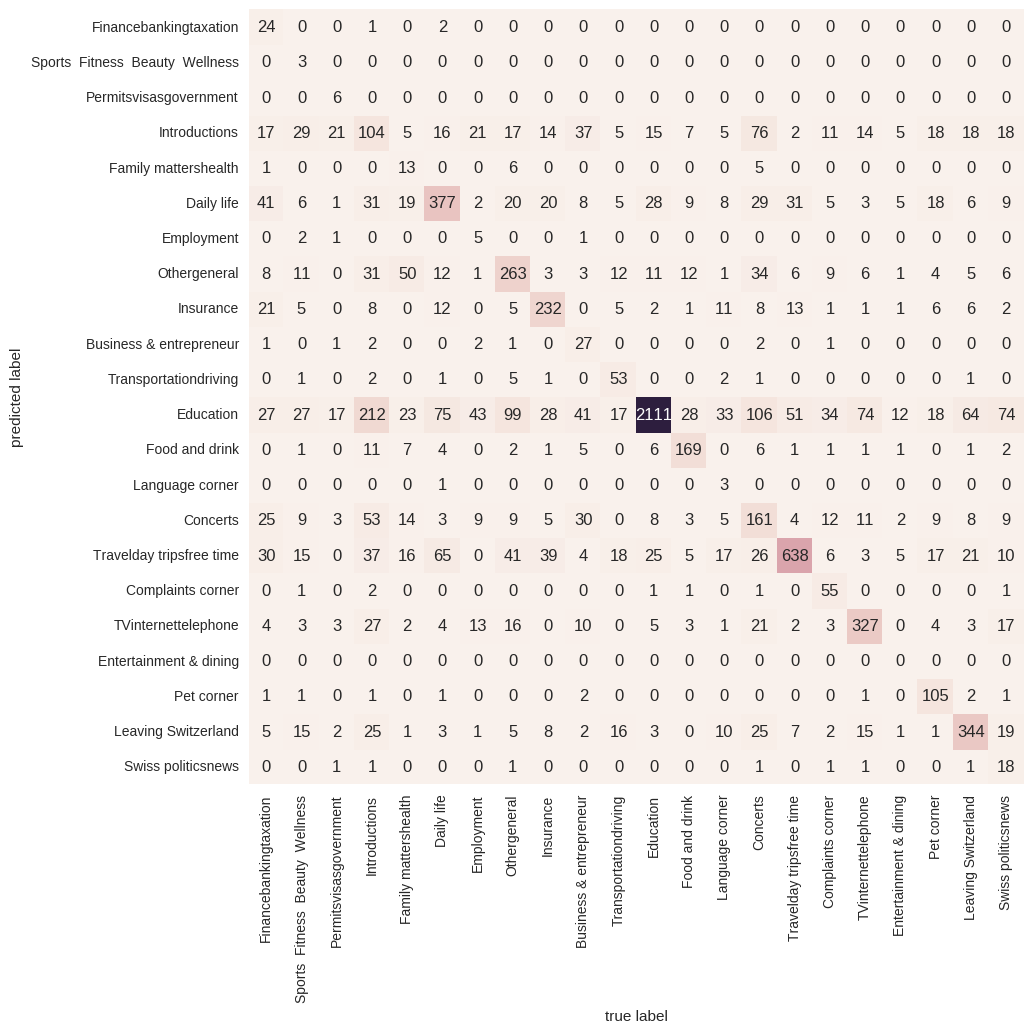

topic values
0 Financebankingtaxation
1 Sports  Fitness  Beauty  Wellness
2 Permitsvisasgovernment
3 Introductions
4 Family mattershealth
5 Daily life
6 Employment
7 Othergeneral
8 Insurance
9 Business & entrepreneur
10 Transportationdriving
11 Education
12 Food and drink
13 Language corner
14 Concerts
15 Travelday tripsfree time
16 Complaints corner
17 TVinternettelephone
18 Entertainment & dining
19 Pet corner
20 Leaving Switzerland
21 Swiss politicsnews
distribution of test
 12    2215
16     755
6      576
4      548
15     502
8      490
23     480
19     457
9      351
13     238
0      205
22     200
24     186
10     170
5      150
17     141
11     131
2      129
7       97
14      96
3       56
21      33
Name: topic, dtype: int64
null accuracy
 12    0.269924
Name: topic, dtype: float64


In [19]:
import seaborn as sns
def findAppearance(obj):
    setTopics=set()
    originalValues=[]
    for i in obj:
        if i not in setTopics:
            originalValues.append(i)
            setTopics.add(i)
    for index,i in enumerate(originalValues):
        originalValues[index]=topic_encoder.inverse_transform(i)
    return originalValues

tickLabels=findAppearance(y_test)
# print(findAppearance(y_pred_class))
# print(topicValues,print(y_pred_class.astype(set)))
# print the confusion matrix
plt.figure(figsize=(10,10))
matrix=metrics.confusion_matrix(y_test, y_pred_class)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=tickLabels, yticklabels=tickLabels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
# examine the class distribution of the testing set
print('topic values')
for index,topic_value in enumerate(tickLabels):
    print(index,topic_value)

print('distribution of test\n',y_test.value_counts())
# calculate null accuracy
print('null accuracy\n',y_test.value_counts().head(1) / y_test.shape)

In [20]:
# first 10 false positives
X_test[y_test < y_pred_class].head(10)

10269           Where to watch the England game in zurich?
39659        Where to Rent Indoor Football Lausanne/Morges
2479                                    Bern area opinions
44780                     Marriage Help - Foreign Resident
47364    Looking For Guitar Teacher in Vevey/Montreux Area
2371           Rental deposit to landlord private account?
24137                     Car in lease and Steuererklärung
50620              Advertising in English speaking circles
19921                                  Two weeks in Zurich
48560                  Swiss Canadian Dual Citizen Divorce
Name: thread, dtype: object

In [21]:
# first 10 false negatives.
X_test[y_test > y_pred_class].head(10)

46765     A year or two off from Swiss school - what age...
101622          Where can I buy car stereo/audio connector?
54133                                  Asian Shop in Luzern
75934                                   Gymnastics in Bern?
104315            Strasbourg to Genoa - Bernard or Gottard?
44639                                  School opportunities
23120     Need suggestions for "real" swiss chalet close...
23025        Switzerland 12th February - 17th February 2010
67583                 The Best Month to move to Switzerland
59688             Good deal from "Die Post" on Ipad 2 and 3
Name: thread, dtype: object

# Let's predict using K-means

Nota: Borrar Support, que está vacio

In [32]:
dfAuthors['ConcertsAuthors'].head(3)
key

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Concerts,"Switzerland Gigs ""Heads Up""",Yokine,151570,1100,Perthia,"06.05.2009, 16:20",Mod Insert: Please . Can't be bothered si...,1233.0,Mar 2006,5.0,"['901', '444']","['1', '1']",6
1,Concerts,Small bars/places with acoustic livemusic?,JHC,931,5,"Lenzburg, Aargau","19.11.2016, 19:45",\r\n\t\t\t\r\n\t\t\tI am living in Kanton Aar...,3.0,Nov 2016,0.0,"['0', '0']","['0', '0']",0
2,Concerts,Jazz clubs Zurich?,aromeroa,3849,16,Spain,"28.11.2015, 22:48",\r\n\t\t\t\r\n\t\t\tHello there! \r\nI am a...,6.0,Jul 2015,0.0,"['0', '0']","['0', '0']",0


In [23]:
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn import cross_validation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

k_means=KMeans(n_clusters=16)
# train the model using X_train_dtm
k_means.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = k_means.predict(X_test_dtm)
# calculate accuracy of class predictions
print('accuracy rate:',metrics.accuracy_score(y_test, y_pred_class))
# k_means.fit(X)
# correct=0
# for i in range(len(X)):
#     predict_me=np.array(X[i].astype(float))
# #     print(predict_me,predict_me.shape())
#     predict_me=predict_me.reshape(-1,len(predict_me))
# #     print(predict_me,predict_me.shape())
#     prediction=clf_topic.predict(predict_me)
#     if(prediction[0]==y[i]):
#         correct+=1
# print(correct/len(X))
# dfJoinShuffle_aux

accuracy rate: 0.0247379965879


/home/josele/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [30]:
min_max_scaler = preprocessing.MaxAbsScaler()
# for column in dfJoinShuffle_aux:
#     dfJoinShuffle_aux[column]=np_scaled = min_max_scaler.fit_transform(df)
locationsProc = preprocessing.LabelEncoder()
dfJoinShuffle_aux.location = locationsProc.fit_transform(dfJoinShuffle_aux.location)
print((dfJoinShuffle_aux.groaned.values))
scaled_values = min_max_scaler.fit_transform(dfJoinShuffle_aux.values)
# print(scaled_values)
# dfJoinShuffle_aux.columns
for index,column in enumerate(dfJoinShuffle_aux):
    dfJoinShuffle_aux[column]=pd.DataFrame(scaled_values)[index]
dfJoinShuffle_aux=dfJoinShuffle_aux.dropna()
# =pd.DataFrame(scaled_values)[0]
# dfJoinShuffle_aux['topic']

/home/josele/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


["['195', '121']" "['3', '1']" "['3', '2']" ..., "['2', '2']" "['0', '0']"
 "['0', '0']"]


ValueError: could not convert string to float: "['0', '0']"

In [107]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.decomposition import TruncatedSVD
from sklearn import cross_validation
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
# from sklearn.cross_validation import train_test_split

pca_shuffle = TruncatedSVD(n_components=2).fit_transform(X_train_dtm,y_train)

# # Determine your k range
# k_range = range(1,20)

# # Fit the kmeans model for each n_clusters = k
# k_means_var = [KMeans(n_clusters=k).fit(pca_shuffle) for k in k_range]

# # Pull out the cluster centers for each model
# centroids = [X.cluster_centers_ for X in k_means_var]

# # Calculate the Euclidean distance from 
# # each point to each cluster center
# k_euclid = [cdist(pca_shuffle, cent, 'euclidean') for cent in centroids]
# dist = [np.min(ke,axis=1) for ke in k_euclid]

# # Total within-cluster sum of squares
# wcss = [sum(d**2) for d in dist]

# # The total sum of squares
# tss = sum(pdist(pca_shuffle)**2)/pca_shuffle.shape[0]

# # The between-cluster sum of squares
# bss = tss - wcss

# # elbow curve
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(k_range, bss/tss*100, 'b*-')
# ax.set_ylim((0,100))
# plt.grid(True)
# plt.xlabel('n_clusters')
# plt.ylabel('Percentage of variance explained')
# plt.title('Variance Explained vs. k')
# plt.show()
# # print(pca_shuffle.shape[0],pca_shuffle.shape[1],fit1,len(fit1),dfJoinShuffle_aux.values)
# silhouette_score(fit, k_means_var[-1].labels_, metric='euclidean')
# # # fit.shape

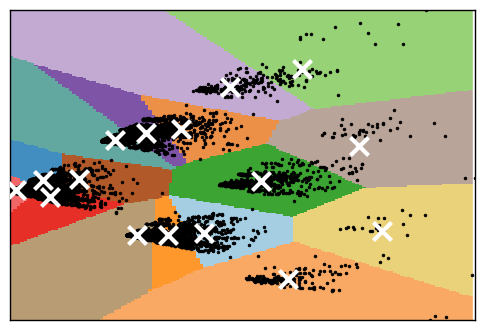

In [31]:
# run 8/random, 7/kmeans++ for silhouette
k_means = KMeans(n_clusters=16)
k_means.fit(pca_shuffle)

x_min, x_max = pca_shuffle[:, 0].min(), pca_shuffle[:, 0].max()
y_min, y_max = pca_shuffle[:, 1].min(), pca_shuffle[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(pca_shuffle[:, 0], pca_shuffle[:, 1], 'k.', markersize=4)
# Plot the centroids as a white X
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [ ]:
#silhouette_score(pca_shuffle,k_means.labels_, metric='euclidean') --> kernel breaks

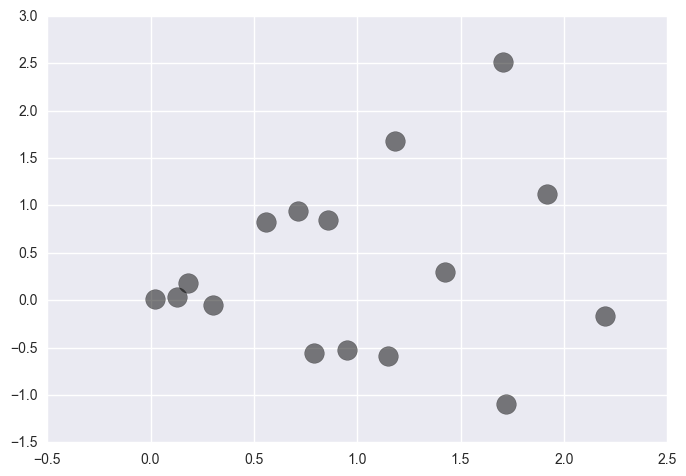

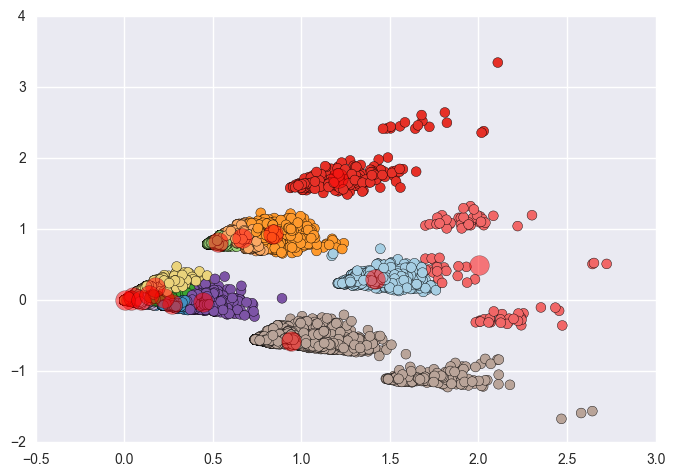

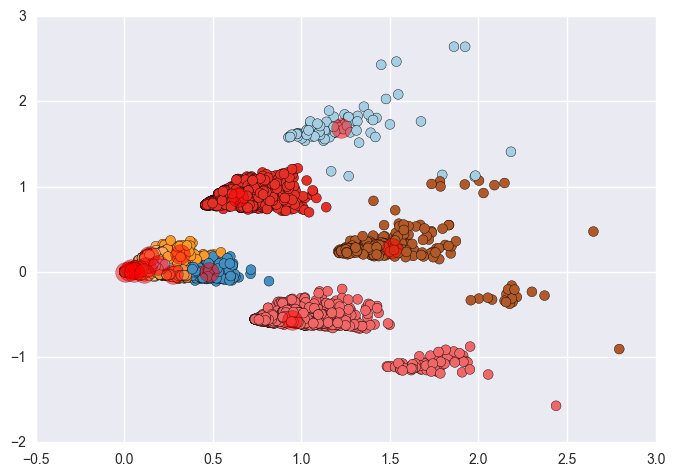

accuracy rate: 0.0377312560857


In [108]:
from sklearn.metrics import pairwise_distances_argmin
expectedPrediction=dfJoinShuffle['topic']
# min_max_scaler = preprocessing.MaxAbsScaler()

kmeans = KMeans(n_clusters=16)
kmeans.fit(pca_shuffle)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()
# method to readjust the cluster centers in order to optimize the minimum distance between centers
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest centersilhouette_score(pca_shuffle, labels, metric='euclidean')
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(pca_shuffle, 16)
plt.scatter(pca_shuffle[:, 0], pca_shuffle[:, 1], c=labels,s=50, cmap=plt.cm.Paired);
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.show()
pca_shuffle_test = TruncatedSVD(n_components=2).fit_transform(X_test_dtm)

prediction=kmeans.predict(pca_shuffle_test)
centers, labels = find_clusters(pca_shuffle_test, 16)
plt.scatter(pca_shuffle_test[:, 0], pca_shuffle_test[:, 1], c=labels,
            s=50,cmap=plt.cm.Paired);
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.show()
print('accuracy rate:',metrics.accuracy_score(y_test, prediction))